# WeatherPy
----

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import random
import csv
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Locking in a Random Seed
random.seed(30)

## Generate Cities List

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [20]:
# Identify the URL and the query url
url = "https://api.openweathermap.org/data/2.5/weather?units=metric&appid="
query_url = url + weather_api_key +"&q="

# Empty lists to group data
city_name = []
Lat = []
Long = []
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed = []
Country = []
Date = []

# Begin for loop, append relevant data and print log
print("Beginning Data Retrieval")
print("-"*30)
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        print("Processing record |" + city)
        city_name.append(response["name"])
        Lat.append(response["coord"]["lat"])
        Long.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloudiness.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date.append(response["dt"])
    except:
        print(city + " not found. Skipping...")
print("-"*30)
print("Ending Data Retrieval")
print("-"*30)

Beginning Data Retrieval
------------------------------
Processing record |ushuaia
Processing record |lavrentiya
Processing record |victoria
Processing record |punta arenas
Processing record |chuy
Processing record |narsaq
Processing record |mar del plata
Processing record |puerto ayora
Processing record |te anau
Processing record |hilo
Processing record |marcona
marconanot found. Skipping...
Processing record |port elizabeth
Processing record |hermanus
Processing record |muroto
Processing record |carnarvon
Processing record |kruisfontein
Processing record |prince rupert
Processing record |thompson
Processing record |hobart
Processing record |salamiyah
Processing record |bonnyville
Processing record |illoqqortoormiut
illoqqortoormiutnot found. Skipping...
Processing record |jamestown
Processing record |qaanaaq
Processing record |kapaa
Processing record |ayotzintepec
Processing record |aflu
aflunot found. Skipping...
Processing record |kaitangata
Processing record |khatanga
Processing r

Processing record |lae
Processing record |rundu
Processing record |hosdurga
Processing record |barentsburg
barentsburgnot found. Skipping...
Processing record |neiafu
Processing record |labuhan
Processing record |bowen
Processing record |smolensk
Processing record |muyezerskiy
Processing record |kununurra
Processing record |sistranda
Processing record |dunmore town
Processing record |port macquarie
Processing record |ampanihy
Processing record |katima mulilo
Processing record |san quintin
Processing record |junin
Processing record |natal
Processing record |bismarck
Processing record |folldal
Processing record |cootamundra
Processing record |airai
Processing record |esperance
Processing record |grand river south east
grand river south eastnot found. Skipping...
Processing record |kargasok
Processing record |columbus
Processing record |warrnambool
Processing record |kodiak
Processing record |hofn
Processing record |namatanai
Processing record |rio gallegos
Processing record |molde
Proces

Processing record |wladyslawowo
Processing record |tautira
Processing record |geraldton
Processing record |juneau
Processing record |grand centre
grand centrenot found. Skipping...
Processing record |broken hill
Processing record |kastamonu
Processing record |tinskoy
Processing record |hambantota
Processing record |coihaique
Processing record |puerto colombia
Processing record |oriximina
Processing record |harper
Processing record |vaitupu
vaitupunot found. Skipping...
Processing record |zhangjiakou
Processing record |kolyvan
Processing record |olafsvik
Processing record |bambanglipuro
Processing record |kaifeng
Processing record |waitara
Processing record |umm durman
umm durmannot found. Skipping...
Processing record |montepuez
Processing record |xuanwu
Processing record |leh
Processing record |zunyi
Processing record |horta
Processing record |kiruna
Processing record |lingao
Processing record |uyuni
Processing record |dzhusaly
dzhusalynot found. Skipping...
Processing record |huarmey

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [34]:
# Gather the data and convert into a dataframe
cities_dict = ({
    "City Name":city_name,
    "Latitude":Lat,
    "Longtitude":Long,
    "Max Temperature":Max_Temp,
    "Humidity":Humidity,
    "Cloudiness":Cloudiness,
    "Wind Speed":Wind_Speed,
    "Country":Country,
    "Date":Date
})

cities_df=pd.DataFrame(cities_dict)
cities_df.head()

,City Name,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,2.81,60,20,1.54,AR,1659955731
1,Lavrentiya,65.5833,-171.0000,1.95,77,100,4.86,RU,1659955732
2,Hong Kong,22.2855,114.1577,30.21,83,59,4.47,HK,1659955111
3,Punta Arenas,-53.1500,-70.9167,-3.94,100,40,1.54,CL,1659955732
4,Chui,-33.6971,-53.4616,10.02,74,39,3.41,UY,1659955733


In [28]:
# Confirm output file and export data into a csv
output_csv='../output_data/cities.csv'

cities_df.to_csv(output_csv,header=True,index=False)
cities_df.describe()

,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Date
count,562.000000,562.000000,562.000000,562.000000,562.000000,562.000000,5.620000e+02
mean,21.072749,17.455777,21.325658,69.017794,53.343416,3.589626,1.659955e+09
std,33.839485,91.113138,8.659093,22.607786,37.178347,2.495123,2.399179e+02
min,-54.800000,-179.166700,-5.020000,1.000000,0.000000,0.000000,1.659955e+09
25%,-7.144375,-61.719850,15.237500,57.250000,18.000000,1.730000,1.659955e+09
50%,26.544800,23.306800,23.350000,74.000000,57.500000,3.090000,1.659955e+09
75%,49.494725,100.427350,27.090000,87.000000,91.000000,4.787500,1.659956e+09
max,78.218600,179.316700,45.250000,100.000000,100.000000,14.680000,1.659956e+09


## Inspect the data and remove the cities where the humidity > 100%.

In [27]:
#Confirming no cities have humidity over 100%.
humidity_over_100 = cities_df.loc[cities_df["Humidity"] > 100]
humidity_over_100.head()

,City Name,Latitude,Longtitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labelling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

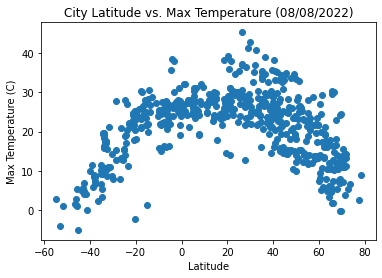

In [41]:
plt.scatter(cities_df["Latitude"],cities_df["Max Temperature"])
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (08/08/2022)");
plt.savefig("../output_data/Fig 1")

The above scatter plot indicates that as cities get closer to the equator, where Latitude is 0, the Cities' Max Temperature is going to be hotter than cities further away from the equator. Additionally, it shows that for the date that the data was requested it was Summer in the Northern Hemispher as overall the cities above the Equator, where Latitude is greater than 0, are generally higher than the temperature of the cities below the Equator.

## Latitude vs. Humidity Plot

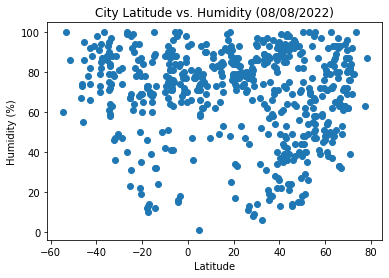

In [39]:
plt.scatter(cities_df["Latitude"],cities_df["Humidity"])
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (08/08/2022)");
plt.savefig("../output_data/Fig 2")

This scatter plot is analysing whether there is a relationship between the humidity of a city to its latitude. It seems that overall the sample cities have a humidity over 40% on the day the data is pulled.

## Latitude vs. Cloudiness Plot

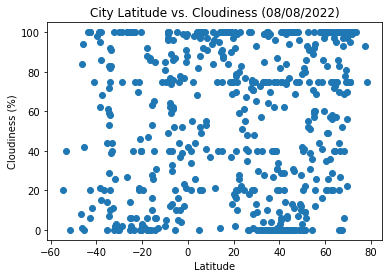

In [42]:
plt.scatter(cities_df["Latitude"],cities_df["Cloudiness"])
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (08/08/2022)");
plt.savefig("../output_data/Fig 3")

In this scatter plot the Cloudiness of the sample city is being plotted against the cities' Latitude. It seems that the Cloudiness is not correlated to the Latitude of the city.

## Latitude vs. Wind Speed Plot

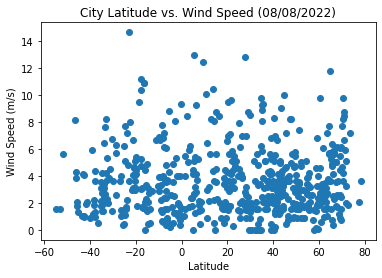

In [43]:
plt.scatter(cities_df["Latitude"],cities_df["Wind Speed"])
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (08/08/2022)");
plt.savefig("../output_data/Fig 4")

## Linear Regression

In [46]:
# Create two dataframes for both hemispheres
northern_hemi = cities_df.loc[cities_df["Latitude"] > 0]
southern_hemi = cities_df.loc[cities_df["Latitude"] < 0]

###  Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

### Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

### Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

### Wind Speed (m/s) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression